# Import Libraries

In [1]:
import pandas as pd
import numpy as np; np.random.seed(42)

from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load Data

In [2]:
# Source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

df = pd.read_csv('kc_house_data.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Visualizations

In [3]:
colors = ['#7CAE7A', '#144552', '#92DCE5', '#F3C178','#3e1f47','#D14081']

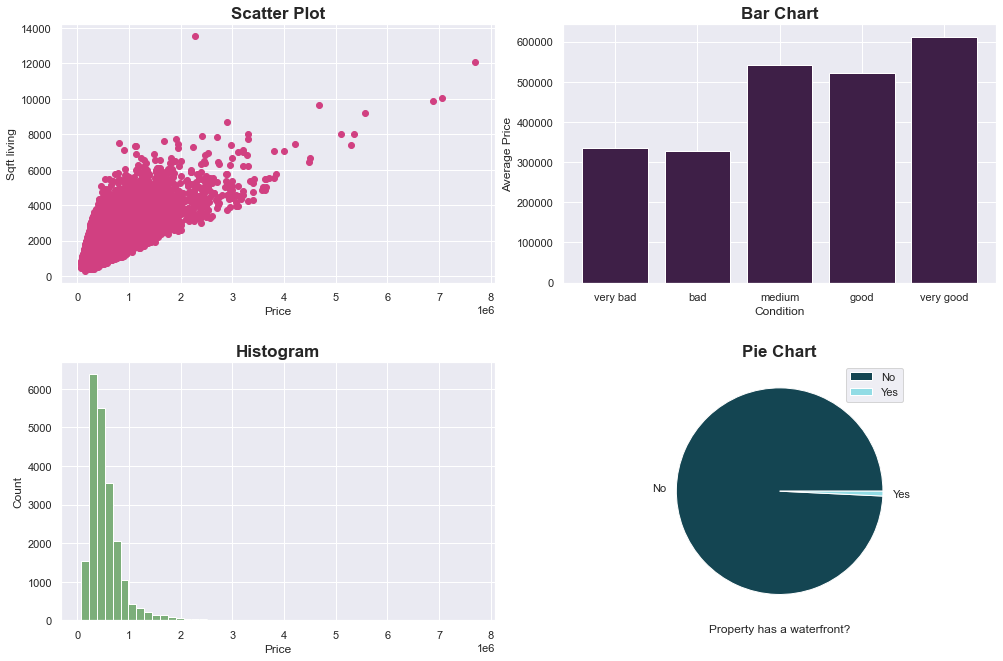

In [4]:
fig = plt.figure(figsize=(15,10))
rows = 2
cols = 2

# Add first scatter plot
fig.add_subplot(rows, cols, 1)
fig.tight_layout(pad=5)

plt.scatter(x=df.price, y=df.sqft_living, c=colors[5])
plt.title('Scatter Plot', weight='bold',size=17)
plt.xlabel('Price')
plt.ylabel('Sqft living')

# Add bar chart
df_condition = df[['condition','price']].copy()
df_condition['condition_cat']= df_condition.condition.map({1:'very bad', 2:'bad', 3:'medium', 4:'good', 5:'very good'})
data = df_condition.sort_values(by='condition').groupby('condition_cat').mean()['price']
data = data.reindex(['very bad', 'bad', 'medium', 'good', 'very good'])

fig.add_subplot(rows, cols, 2)
plt.bar(x=data.index, height=data, color=colors[4])
plt.title('Bar Chart', weight='bold',size=17)
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks()

# Add histogram
fig.add_subplot(rows, cols, 3)
plt.hist(x=df.price, bins=50, color=colors[0])
plt.title('Histogram', weight='bold',size=17)
plt.xlabel('Price')
plt.ylabel('Count')

# Add pie chart
fig.add_subplot(rows, cols, 4)
plt.pie(df.groupby('waterfront').count()['id'] / len(df), labels=['No', 'Yes'], colors=colors[1:3])
plt.title('Pie Chart', weight='bold', size=17)
plt.xlabel('Property has a waterfront?')
plt.legend()

# Show plots
plt.savefig('visualizations.png')
plt.show()

## Central Tendencies

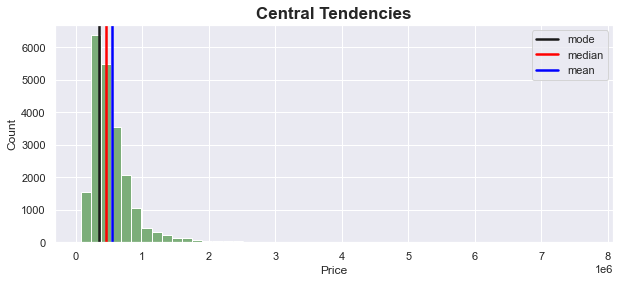

In [5]:
prices = df['price']

median = prices.median()
mean = prices.mean()
mode = prices.mode()[0]

plt.figure(figsize=(10,4))
plt.hist(x=prices, bins=50, color=colors[0])
plt.title('Central Tendencies', weight='bold',size=17)
plt.xlabel('Price')
plt.ylabel('Count')

plt.axvline(x=mode, ymin=0, ymax=2500, color='k', label='mode', linewidth=2.5)
plt.axvline(x=median, ymin=0, ymax=2500, color='red', label='median', linewidth=2.5)
plt.axvline(x=mean, ymin=0, ymax=2500, color='blue', label='mean', linewidth=2.5)

plt.legend()

plt.savefig('central_tendencies.png')
plt.show()

## Dispersion

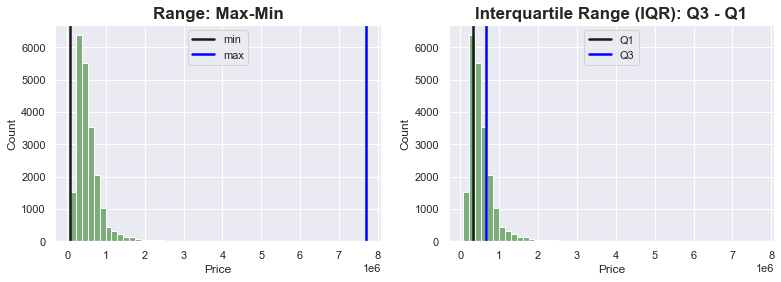

In [6]:
fig = plt.figure(figsize=(12,5))
rows = 1
cols = 2

# First - Range
fig.add_subplot(rows, cols, 1)
fig.tight_layout(pad=5)

min_ = prices.min()
max_ = prices.max()

plt.hist(x=prices, bins=50, color=colors[0])
plt.title('Range: Max-Min', weight='bold',size=17)
plt.xlabel('Price')
plt.ylabel('Count')

plt.axvline(x=min_, color='k', label='min', linewidth=2.5)
plt.axvline(x=max_, color='blue', label='max', linewidth=2.5)

plt.annotate(f'Max - Min = {round(max_-min_):,}', (mean*12000, 3000), weight='bold', size=14, color='gray')

plt.legend(loc='upper center')


# Second - IQR
fig.add_subplot(rows, cols, 2)
q1, median, q3 = prices.quantile([0.25,0.5,0.75])

plt.hist(x=prices, bins=50, color=colors[0])
plt.title('Interquartile Range (IQR): Q3 - Q1', weight='bold',size=17)
plt.xlabel('Price')
plt.ylabel('Count')

plt.axvline(x=q1, color='k', label='Q1', linewidth=2.5)
plt.axvline(x=q3, color='blue', label='Q3', linewidth=2.5)

plt.annotate(f'IQR = Q3-Q1 = {round(q3-q1):,}', (mean*12000, 3000), weight='bold', size=14, color='gray')

plt.legend(loc='upper center')


# Show plots
plt.savefig('spread.png')
plt.show()

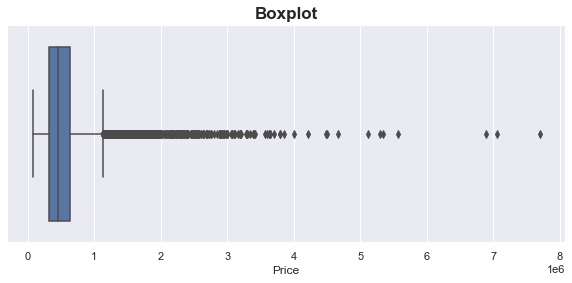

In [7]:
plt.figure(figsize=(10,4))
sns.boxplot(x=prices)
plt.title('Boxplot', weight='bold', size=17)
plt.xlabel('Price')
plt.savefig('boxplot.png')
plt.show()

## Normal Distribution

## One Normal Distribution

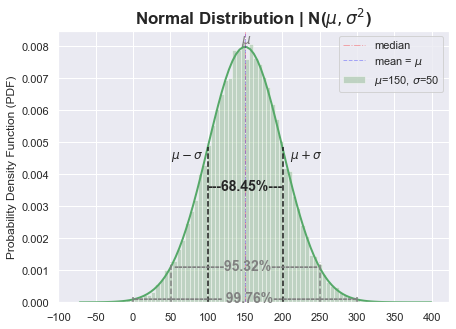

In [11]:
# source: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
plt.figure(figsize=(7,5))

# Generate some data for this demonstration (histogram)
mu1, sigma1 = 150, 50 # mean and standard deviation
high_std = norm.rvs(mu1, sigma1, size=50_000)

plt.hist(high_std, bins=75, density=True, alpha=0.4, color=colors[0], label=r'$\mu$=150, $\sigma$=50')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, sigma1)
plt.plot(x, p, 'g', linewidth=2)
plt.title(r'Normal Distribution | N($\mu, \sigma^2$)', weight='bold', size=17)


# Central Tendencies
median = np.median(high_std)
mean = np.mean(high_std)
std = np.std(high_std)

plt.axvline(x=median, ymin=0, color='red', label='median', linewidth=1, linestyle='-.', alpha=0.3)
plt.axvline(x=mean, ymin=0, color='blue', label=r'mean = $\mu$', linewidth=1, linestyle='--', alpha=0.3)


# STD
# 1-STD
std = np.std(high_std)
one_std = np.where((high_std > mean-std) & (high_std < mean+std), 1, 0)
one_std= one_std.sum() / len(one_std) 
plt.axvline(x=mean-std, ymax=0.57, color='k', linewidth=1.5, linestyle='--')
plt.axvline(x=mean+std, ymax=0.57, color='k', linewidth=1.5, linestyle='--')

plt.annotate(r'$\mu+\sigma$', (mean+std+10, 0.0045))
plt.annotate(r'$\mu-\sigma$', (mean-std-50, 0.0045))

plt.annotate(f'---{one_std:.2%}---', (mean,  0.0035), weight='bold', size=14, ha='center')
plt.annotate(r'$\mu$', (mean-5,  0.05), weight='bold', size=14)


# 2-STD
two_std = np.where((high_std > mean-std*2) & (high_std < mean+std*2), 1, 0)
two_std= two_std.sum() / len(two_std)
plt.axvline(x=mean-std*2, ymax=0.15, color='gray', linewidth=1.5, linestyle='--')
plt.axvline(x=mean+std*2, ymax=0.15, color='gray', linewidth=1.5, linestyle='--')

plt.annotate(f'-----------{two_std:.2%}----------', (mean, 0.001), weight='bold', size=14, color='gray', ha='center')
plt.annotate(r'$\mu$', (mean-5, 1470), weight='bold', size=14, color='gray')


# 3-STD
three_std = np.where((high_std > mean-std*3) & (high_std < mean+std*3), 1, 0)
three_std = three_std.sum() / len(three_std)
plt.axvline(x=mean-std*3, ymax=0.02, color='gray', linewidth=1.5, linestyle='--')
plt.axvline(x=mean+std*3, ymax=0.02, color='gray', linewidth=1.5, linestyle='--')

plt.annotate(f'------------------- {three_std:.2%}------------------', xy=(mean, 0.), weight='bold', size=14, color='gray', ha='center')
plt.annotate(r'$\mu$', xy=(mean-5, 0.0081), weight='bold', size=14, color='gray')

plt.xticks(np.arange(-100,450,50))

plt.ylabel('Probability Density Function (PDF)')
plt.legend()

plt.savefig('normaldist.png')
plt.show()

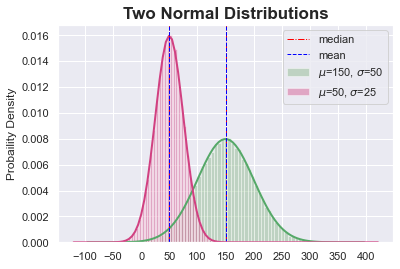

In [9]:
# Previuos histogram
plt.hist(high_std, bins=75, density=True, alpha=0.4, color=colors[0], label=r'$\mu$=150, $\sigma$=50')
p = norm.pdf(x, mu1, sigma1)
plt.plot(x, p, 'g', linewidth=2)

plt.axvline(x=median, ymin=0, color='red',  linewidth=1, linestyle='-.')
plt.axvline(x=mean, ymin=0, color='blue', linewidth=1, linestyle='--')


# New distribution
mu, sigma = 50, 25 # mean and standard deviation
low_std = norm.rvs(mu, sigma, size=50_000)
plt.hist(low_std, bins=75, density=True, alpha=0.4, color=colors[5], label=r'$\mu$=50, $\sigma$=25')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, colors[5], linewidth=2)

median = np.median(low_std)
mean = np.mean(low_std)

plt.axvline(x=median, ymin=0, color='red', label='median', linewidth=1, linestyle='-.')
plt.axvline(x=mean, ymin=0, color='blue', label='mean', linewidth=1, linestyle='--')

# Final config
plt.title(r'Two Normal Distributions', weight='bold', size=17)

plt.xticks(np.arange(-100,450,50))
plt.legend()
plt.ylabel('Probaility Density')
plt.savefig('two_normaldist.png')
plt.show()

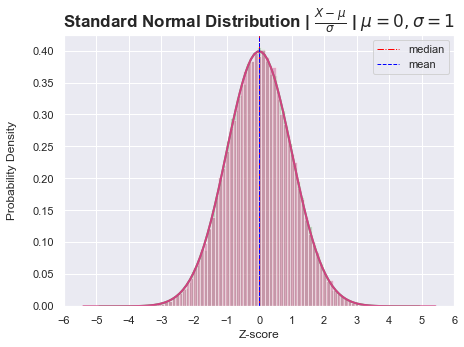

In [10]:
plt.figure(figsize=(7,5))

# Green Hist
st_high_std = (high_std - high_std.mean())/high_std.std()
plt.hist(st_high_std, bins=75, density=True, alpha=0.4, color=colors[0])

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'g', linewidth=2)

median = np.median(st_high_std)
mean = np.mean(st_high_std)

plt.axvline(x=median, ymin=0, color='red',  linewidth=1, linestyle='-.')
plt.axvline(x=mean, ymin=0, color='blue', linewidth=1, linestyle='--')




# Pink Hist
st_low_std = (low_std - low_std.mean())/low_std.std()
plt.hist(st_low_std, bins=75, density=True, alpha=0.4, color=colors[5])

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, colors[5], linewidth=2)

median = np.median(st_low_std)
mean = np.mean(st_low_std)

plt.axvline(x=median, ymin=0, color='red', label='median', linewidth=1, linestyle='-.')
plt.axvline(x=mean, ymin=0, color='blue', label='mean', linewidth=1, linestyle='--')

# Final config
plt.title(r'Standard Normal Distribution | $\frac{X - \mu}{\sigma}$ | $\mu = 0, \sigma=1$', weight='bold', size=17)

plt.xticks(np.arange(-6,7,1))
plt.xlabel('Z-score')
plt.ylabel('Probability Density\n')
plt.legend()

plt.savefig('st_normaldist.png')
plt.show()